In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


In [2]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2023-10-18 14:32:06--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.003s  

2023-10-18 14:32:06 (27.2 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [3]:
df = pd.read_csv('FuelConsumption.csv')


In [4]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
x = df[['ENGINESIZE']]
y = df['CO2EMISSIONS']

In [6]:
bool_array = np.random.rand(len(x))<0.8 


In [7]:
bool_array

array([False,  True,  True, ...,  True,  True,  True])

In [8]:
train_x = x[bool_array]
train_y = y[bool_array]
test_x = x[~bool_array]
test_y = y[~bool_array]

In [10]:
train_x = np.asanyarray(train_x)
train_y = np.asanyarray(train_y)

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
train_x_poly = poly.fit_transform(train_x)

In [13]:
train_x_poly

array([[ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

In [14]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(train_x_poly, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
reg.coef_

array([ 0.        , 50.73549613, -1.54794467])

In [16]:
reg.intercept_

106.73029332428976

In [17]:
test_x = np.asanyarray(test_x)
test_y = np.asanyarray(test_y)

In [19]:
test_x.shape

(223, 1)

In [20]:
train_x.shape

(844, 1)

In [21]:
test_x_poly = poly.transform(test_x)

In [23]:
test_x_poly[:5]

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  3.5 , 12.25],
       [ 1.  ,  3.5 , 12.25],
       [ 1.  ,  3.7 , 13.69],
       [ 1.  ,  3.5 , 12.25]])

In [24]:
train_x_poly[:5]

array([[ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  3.5 , 12.25],
       [ 1.  ,  3.5 , 12.25],
       [ 1.  ,  3.7 , 13.69]])

In [27]:
pred_y = reg.predict(test_x_poly)

In [28]:
pred_y.shape, test_y.shape

((223,), (223,))

In [30]:
np.concatenate((pred_y[:, np.newaxis], test_y[:, np.newaxis]), axis = 1)[:5]

array([[202.00950691, 196.        ],
       [265.3422076 , 255.        ],
       [265.3422076 , 244.        ],
       [273.2602665 , 267.        ],
       [265.3422076 , 239.        ]])

In [32]:
reg.score(train_x_poly, train_y)

0.7654055981427659

In [34]:
from sklearn.metrics import r2_score, mean_squared_error
print("r2 score", r2_score(pred_y, test_y))
print("MSE", mean_squared_error(pred_y, test_y))


r2 score 0.7052013584414396
MSE 840.3681418036653


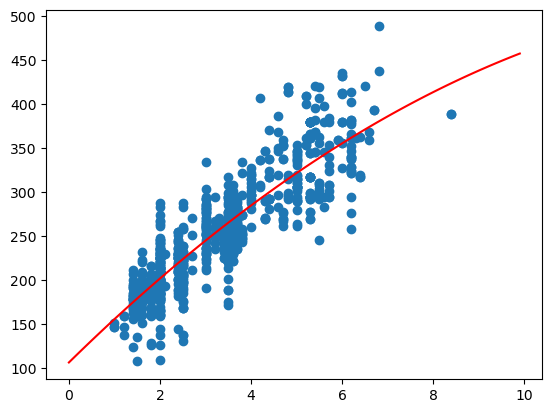

In [46]:
plt.scatter(train_x, train_y)
create_x = np.arange(0., 10.0, 0.1).reshape(-1,1)
create_x_poly = poly.transform(create_x)
plt.plot(create_x,reg.predict(create_x_poly) , color = 'red')

In [40]:
ll = np.arange(0., 10.0, 0.1).reshape(-1,1)

In [37]:
train_x.shape

(844, 1)

In [44]:
ll.shape

(100, 1)

In [42]:
ll2 = poly.transform(ll)

In [43]:
ll2

array([[1.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 1.000e-01, 1.000e-02],
       [1.000e+00, 2.000e-01, 4.000e-02],
       [1.000e+00, 3.000e-01, 9.000e-02],
       [1.000e+00, 4.000e-01, 1.600e-01],
       [1.000e+00, 5.000e-01, 2.500e-01],
       [1.000e+00, 6.000e-01, 3.600e-01],
       [1.000e+00, 7.000e-01, 4.900e-01],
       [1.000e+00, 8.000e-01, 6.400e-01],
       [1.000e+00, 9.000e-01, 8.100e-01],
       [1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 1.100e+00, 1.210e+00],
       [1.000e+00, 1.200e+00, 1.440e+00],
       [1.000e+00, 1.300e+00, 1.690e+00],
       [1.000e+00, 1.400e+00, 1.960e+00],
       [1.000e+00, 1.500e+00, 2.250e+00],
       [1.000e+00, 1.600e+00, 2.560e+00],
       [1.000e+00, 1.700e+00, 2.890e+00],
       [1.000e+00, 1.800e+00, 3.240e+00],
       [1.000e+00, 1.900e+00, 3.610e+00],
       [1.000e+00, 2.000e+00, 4.000e+00],
       [1.000e+00, 2.100e+00, 4.410e+00],
       [1.000e+00, 2.200e+00, 4.840e+00],
       [1.000e+00, 2.300e+00, 5.29